In [23]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer         
from sklearn.feature_extraction.text import TfidfVectorizer     

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.metrics import accuracy_score
from collections import Counter
import string
from sklearn.metrics import confusion_matrix
import re
import pickle
from sklearn.decomposition import TruncatedSVD

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import time
import pickle

In [216]:
data = pd.read_csv("data/Reviews.csv")

In [217]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [218]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [219]:
data.shape

(568454, 10)

In [220]:
data = data[data['Score'] != 3]

In [221]:
data.Score.unique()

array([5, 1, 4, 2])

In [222]:
data['Score'].value_counts()

5    363122
4     80655
1     52268
2     29769
Name: Score, dtype: int64

In [223]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

score = data['Score']
temp = score.map(partition)
data['Score'] = temp

In [224]:
data = data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"})

In [225]:
data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]

In [226]:
data = data.iloc[:100000,:]

In [227]:
data_X = data['Text']
data_Y = data['Score']

In [228]:
data_Y.values[1]

'negative'

In [229]:
print(set(stopwords.words('english')))

{'being', 'through', 'now', 'where', 'be', 'very', "weren't", "don't", 'hadn', 'were', 'didn', 'for', 'yours', 'couldn', 'of', 'these', 'ourselves', 'at', 'mightn', 'myself', 'ours', 'him', 'by', "it's", 'haven', 'doesn', "wasn't", 'in', 'll', 'further', 'won', 'all', 'them', 'whom', 'had', 'and', 'my', 'when', 'those', 'into', 'nor', 'an', 'only', "should've", "shan't", 'am', 'own', 'between', 'their', 'i', 'same', 'so', 'm', 'y', 'does', 'itself', "shouldn't", "aren't", 'from', 'd', 'most', 'yourselves', 'has', 'did', 'such', 'weren', 'it', 'theirs', 'up', 'some', "mightn't", 'out', 'more', "isn't", "you're", 'who', 'wasn', 'after', 'we', 'against', 't', 'themselves', 'how', 'than', 're', 'her', 'can', 'any', "needn't", 'our', 'not', "mustn't", 'over', 'should', "that'll", 'just', 'isn', 'is', 'during', "doesn't", 'until', 'while', 'as', 'what', "she's", 'ma', 'about', "couldn't", 'under', "you'll", 'the', 'each', 'don', 'his', 'are', 've', 'shan', "you've", 'this', 's', 'was', "woul

In [7]:
import re
snow = nltk.stem.SnowballStemmer('english')
stop = set(stopwords.words('english'))

def cleanhtml(sentence):
    sentence = sentence.lower()                                       # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)                          # Cleaning Html tags
    
    return sentence

def cleanpunc(sentence):
    sentence = re.sub('[^A-Za-z0-9]+', '', sentence)                # Cleaning punctuations
    
    return sentence

In [231]:
temp = []
str1 = ''
positive_words = []
negative_words = []
i = 0
for sentence in data_X:
    words = []
    sentence = cleanhtml(sentence)
    for word in sentence.split():
        word = cleanpunc(word)
        if((word.isalpha()) & (len(word) > 2)): 
            if word not in stop:
                s = snow.stem(word).encode('utf8')
                words.append(s)
                if (data_Y.values)[i] == 'positive': 
                    positive_words.append(s) #list of all words used to describe positive reviews.
                if(data_Y.values)[i] == 'negative':
                    negative_words.append(s) #list of all words used to describe negative reviews.
            else:
                continue
        else:
                continue
    str1 = b" ".join(words)
    temp.append(str1)
    i += 1

In [261]:
temp[:10]

[b'bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better',
 b'product arriv label jumbo salt peanutsth peanut actual small size unsalt sure error vendor intend repres product jumbo',
 b'confect around centuri light pillowi citrus gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor high recommend yummi treat familiar stori lewi lion witch wardrob treat seduc edmund sell brother sister witch',
 b'look secret ingredi robitussin believ found got addit root beer extract order good made cherri soda flavor medicin',
 b'great taffi great price wide assort yummi taffi deliveri quick taffi lover deal',
 b'got wild hair taffi order five pound bag taffi enjoy mani flavor watermelon root beer melon peppermint grape etc complaint bit much redblack licoriceflavor piec particular favorit kid husband last two week would recommend brand taffi delight treat',
 b'saltwat

In [262]:
data_X = temp

In [263]:
df = pd.DataFrame(list(zip(data_X, data_Y)), columns = ['Text', 'Sentiment'] )

In [3]:
df.to_pickle('data/cleaned_file.pkl')

NameError: name 'df' is not defined

In [8]:
df = pd.read_pickle('data/cleaned_file.pkl')

In [9]:
df.head()

,Text,Sentiment
0,b'bought sever vital can dog food product foun...,positive
1,b'product arriv label jumbo salt peanutsth pea...,negative
2,b'confect around centuri light pillowi citrus ...,positive
3,b'look secret ingredi robitussin believ found ...,negative
4,b'great taffi great price wide assort yummi ta...,positive


In [10]:
df['Text'][2]

b'confect around centuri light pillowi citrus gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor high recommend yummi treat familiar stori lewi lion witch wardrob treat seduc edmund sell brother sister witch'

In [11]:
X = df["Text"]
y = df["Sentiment"]

In [12]:
df.shape, X.shape, y.shape

((100000, 2), (100000,), (100000,))

In [14]:
import math 

X_1 = X[:math.ceil(len(df)*0.8)]
y_1 = y[:math.ceil(len(df)*0.8)]
X_test = X[math.ceil(len(df)*0.8):]
y_test = y[math.ceil(len(df)*0.8):]

X_train = X_1[:math.ceil(len(df)*0.6)]
y_train = y_1[:math.ceil(len(df)*0.6)]
X_cv = X_1[math.ceil(len(df)*0.6):]
y_cv = y_1[math.ceil(len(df)*0.6):]

print(X_train.shape, y_train.shape, X_cv.shape, X_test.shape)

(60000,) (60000,) (20000,) (20000,)


## Perform Naive Bayes using BOW and calculate 'alpha'

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

In [16]:
count_vect = CountVectorizer() #in scikit-learn
X_train = count_vect.fit_transform(X_train)

In [17]:
X_test = count_vect.transform(X_test)
X_cv = count_vect.transform(X_cv)

In [18]:
X_train

<60000x46146 sparse matrix of type '<class 'numpy.int64'>'
	with 1930676 stored elements in Compressed Sparse Row format>

In [19]:
neighbors = [10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]

In [20]:
cv_scores = []
   
for k in neighbors:
    nb = MultinomialNB(alpha=k)
     # fitting the model on crossvalidation train
    nb.fit(X_train, y_train)
    # predict the response on the crossvalidation train
    pred = nb.predict(X_cv)
     # evaluate CV accuracy
    f1_value = f1_score(y_cv, pred, average='weighted') * float(100)
    cv_scores.append(f1_value)
    print('\nCV F1-Scores for alpha = %f is %d%%' % (k, f1_value))


CV F1-Scores for alpha = 0.001000 is 87%

CV F1-Scores for alpha = 0.010000 is 88%

CV F1-Scores for alpha = 0.100000 is 89%

CV F1-Scores for alpha = 1.000000 is 89%

CV F1-Scores for alpha = 10.000000 is 77%

CV F1-Scores for alpha = 100.000000 is 76%

CV F1-Scores for alpha = 1000.000000 is 76%


In [21]:
MSE = [100 - x for x in cv_scores]

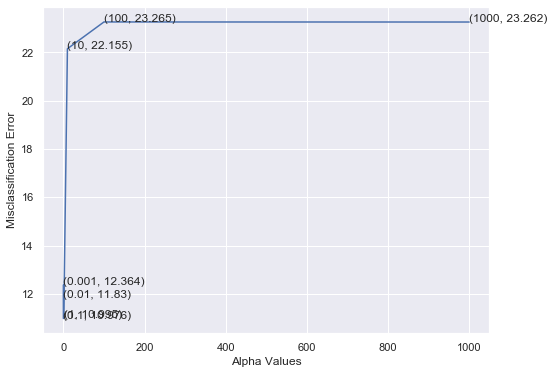

the misclassification error for each alpha value is :  [12.364 11.83  10.976 10.995 22.155 23.265 23.262]


In [24]:
plt.figure(figsize=(8,6))
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Alpha Values')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,3))

In [25]:
optimal_alpha = neighbors[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is %f.' % optimal_alpha)


The optimal value of alpha is 0.100000.


In [27]:
nb = MultinomialNB(alpha=optimal_alpha)
nb.fit(X_train, y_train)
pred = nb.predict(X_test)
f1_value = f1_score(y_test, pred,average='weighted') * float(100)
print('\nThe F1-Score of the nb classifier for alpha = %f is %f%%' % (optimal_alpha, f1_value))


The F1-Score of the nb classifier for alpha = 0.100000 is 89.552575%


[[TN FP        FN TP]]


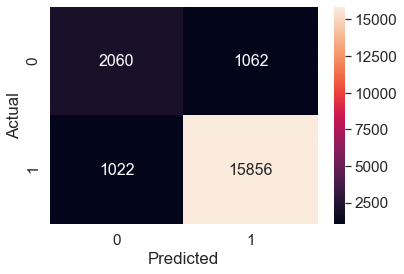

In [30]:
array = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
print("[[TN FP\
        FN TP]]")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature importance for both +ve and -ve class

In [31]:
new_final=pd.concat([X,y],ignore_index=False,axis=1)

In [32]:
new_final.shape

(100000, 2)

In [33]:
new_final.head()

,Text,Sentiment
0,b'bought sever vital can dog food product foun...,positive
1,b'product arriv label jumbo salt peanutsth pea...,negative
2,b'confect around centuri light pillowi citrus ...,positive
3,b'look secret ingredi robitussin believ found ...,negative
4,b'great taffi great price wide assort yummi ta...,positive


In [35]:
def partition(x):
    if x == 'positive':
        return 1
    return 0

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = new_final['Sentiment']
Zero_one = actualScore.map(partition) 
new_final['Actual_Score'] = Zero_one

In [36]:
new_final.head()

,Text,Sentiment,Actual_Score
0,b'bought sever vital can dog food product foun...,positive,1
1,b'product arriv label jumbo salt peanutsth pea...,negative,0
2,b'confect around centuri light pillowi citrus ...,positive,1
3,b'look secret ingredi robitussin believ found ...,negative,0
4,b'great taffi great price wide assort yummi ta...,positive,1


In [37]:
X1=X_train

In [38]:
y1=new_final['Actual_Score']
y1=y1[:60000]

In [48]:
all_features = count_vect.get_feature_names()
all_nd_features = np.array(all_features)
all_nd_features, len(all_nd_features)

(array(['aaa', 'aaaa', 'aaaaa', ..., 'zwieback', 'zylitol', 'zyto'],
       dtype='<U71'), 46146)

In [40]:
clf=MultinomialNB(alpha=optimal_alpha)

In [41]:
clf.fit(X1,y1)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [53]:
clf.feature_log_prob_

array([[-15.26903497, -15.26903497, -15.26903497, ..., -15.26903497,
        -15.26903497, -15.26903497],
       [-13.06444464, -13.3440295 , -14.38012143, ..., -14.38012143,
        -13.73349427, -14.38012143]])

In [50]:
neg_class_prob_sorted = (clf.feature_log_prob_[0, :])
neg_class_prob_sorted, len(neg_class_prob_sorted)

(array([-15.26903497, -15.26903497, -15.26903497, ..., -15.26903497,
        -15.26903497, -15.26903497]), 46146)

In [46]:
negative_dict = dict(zip(all_nd_features, neg_class_prob_sorted))

In [51]:
pos_class_prob_sorted = (clf.feature_log_prob_[1, :])

In [55]:
positive_dict = dict(zip(all_nd_features,pos_class_prob_sorted))
# positive_dict

In [56]:
negative_100_features = sorted(negative_dict, key = negative_dict.get, reverse = True)[:100]

In [57]:
positive_100_features = sorted(positive_dict, key = positive_dict.get, reverse = True)[:100]

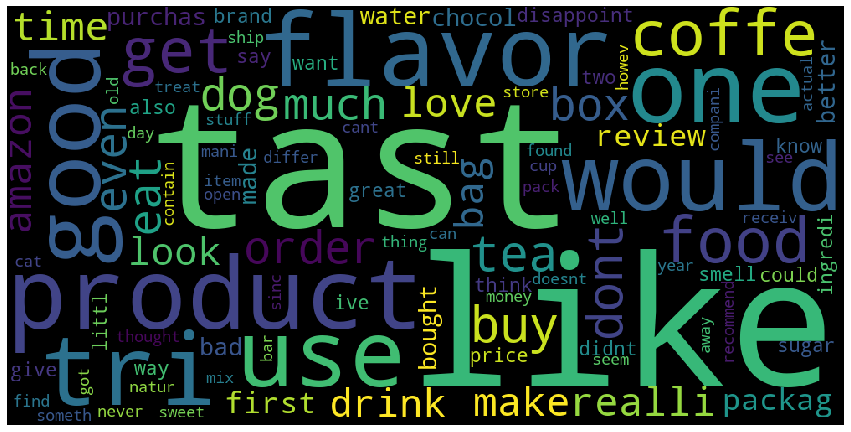

In [60]:
from collections import Counter
from wordcloud import WordCloud
word_could_dict=Counter(negative_100_features)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off") 
plt.show()

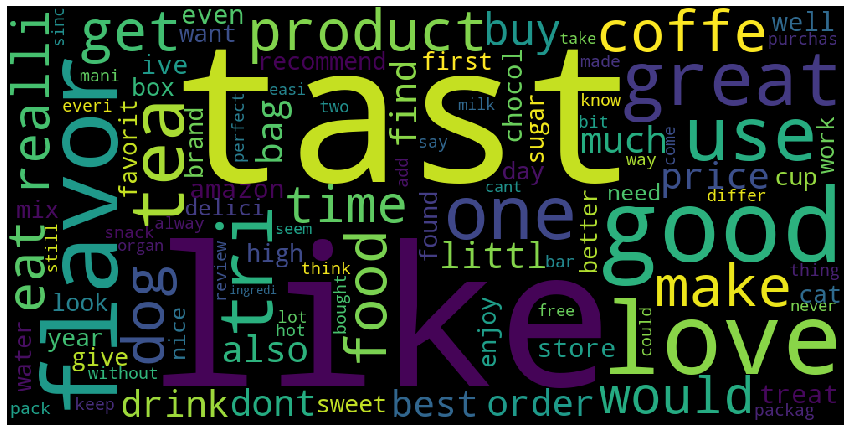

In [61]:
# WordCloud for class 1
word_could_dict=Counter(positive_100_features)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off") 
plt.show()

## tf_idf

In [62]:
X_1 = X[:math.ceil(len(df)*.8)]
y_1 = y[:math.ceil(len(df)*.8)]
X_test = X[math.ceil(len(df)*.8):]
y_test = y[math.ceil(len(df)*.8):]

X_train = X_1[:math.ceil(len(df)*.6)]
y_train = y_1[:math.ceil(len(df)*.6)]
X_cv = X_1[math.ceil(len(df)*.6):]
y_cv = y_1[math.ceil(len(df)*.6):]

In [63]:
tf_idf_vect = TfidfVectorizer()
X_train = tf_idf_vect.fit_transform(X_train)

In [64]:
X_test = tf_idf_vect.transform(X_test)
X_cv = tf_idf_vect.transform(X_cv)

In [65]:
X_train

<60000x46146 sparse matrix of type '<class 'numpy.float64'>'
	with 1930676 stored elements in Compressed Sparse Row format>

In [66]:
cv_scores = []

   
for k in neighbors:
    nb = MultinomialNB(alpha=k)
     # fitting the model on crossvalidation train
    nb.fit(X_train, y_train)
    # predict the response on the crossvalidation train
    pred = nb.predict(X_cv)
     # evaluate CV accuracy
    f1_value = f1_score(y_cv, pred, average='weighted') * float(100)
    cv_scores.append(f1_value)
    print('\nCV F1-Scores for alpha = %f is %d%%' % (k, f1_value))


CV F1-Scores for alpha = 0.001000 is 82%

CV F1-Scores for alpha = 0.010000 is 83%

CV F1-Scores for alpha = 0.100000 is 82%

CV F1-Scores for alpha = 1.000000 is 77%

CV F1-Scores for alpha = 10.000000 is 76%

CV F1-Scores for alpha = 100.000000 is 76%

CV F1-Scores for alpha = 1000.000000 is 76%


In [67]:
MSE = [100 - x for x in cv_scores]

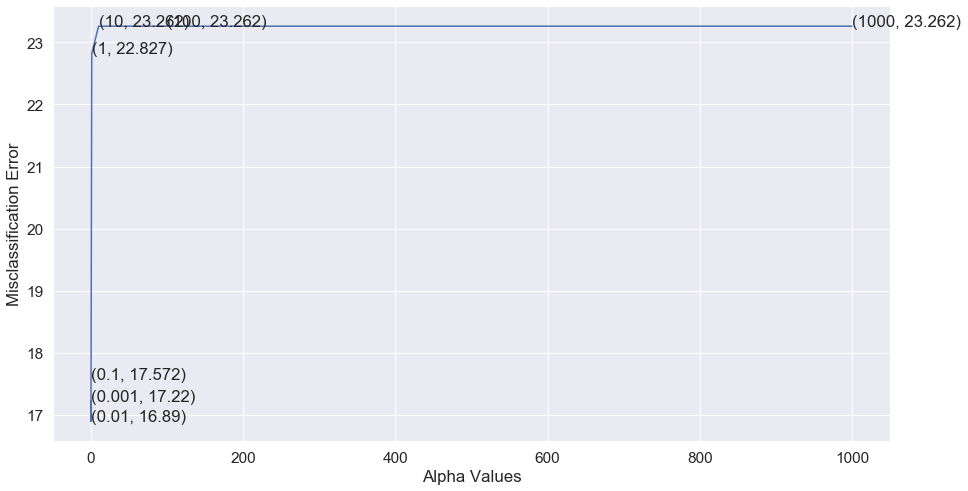

the misclassification error for each alpha value is :  [17.22  16.89  17.572 22.827 23.262 23.262 23.262]


In [68]:
plt.figure(figsize=(15,8))
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Alpha Values')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,3))

In [69]:
optimal_alpha = neighbors[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is %f.' % optimal_alpha)


The optimal value of alpha is 0.010000.


In [71]:
nb = MultinomialNB(alpha=optimal_alpha)
nb.fit(X_train, y_train)
pred = nb.predict(X_test)
f1_value = f1_score(y_test, pred, average='weighted') * 100
print('\nThe F1-Score of the nb classifier for alpha = %f is %f%%' % (optimal_alpha, f1_value))


The F1-Score of the nb classifier for alpha = 0.010000 is 84.761012%


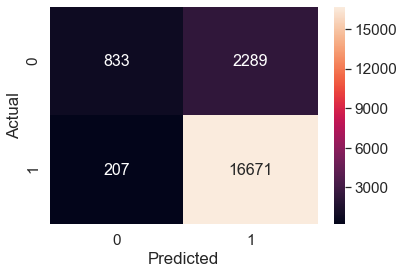

In [73]:
array=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature importance for both +ve and -ve class

In [74]:
X1=X_train

y1=new_final['Actual_Score']
y1=y1[:60000]

In [75]:
all_features=tf_idf_vect.get_feature_names()
all_nd1_features=np.array(all_features)

In [76]:
clf1=MultinomialNB(alpha=optimal_alpha)

In [77]:
clf1.fit(X1,y1)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [79]:
neg_class_prob_sorted = (clf1.feature_log_prob_[0, :])
negative_dict=dict(zip(all_nd1_features,neg_class_prob_sorted))

In [80]:
pos_class_prob_sorted = (clf1.feature_log_prob_[1, :])
positive_dict=dict(zip(all_nd1_features,pos_class_prob_sorted))

In [81]:
negative_100_features=sorted(negative_dict, key=negative_dict.get, reverse=True)[:100]
positive_100_features=sorted(positive_dict, key=positive_dict.get, reverse=True)[:100]

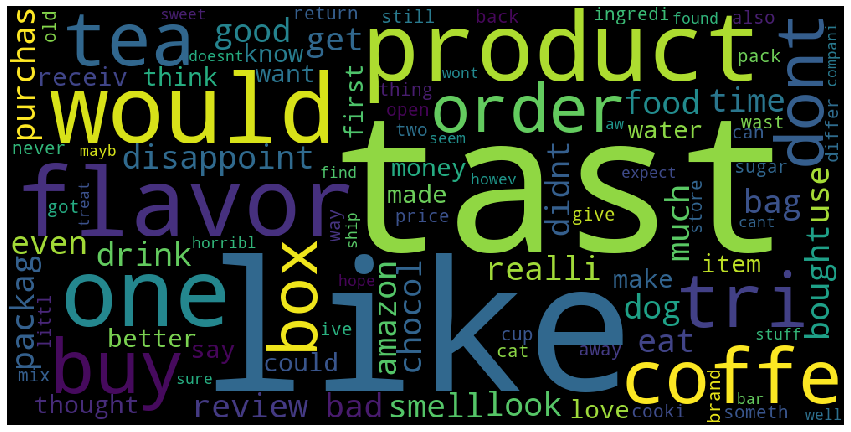

In [82]:
# WordCloud for class 0
word_could_dict=Counter(negative_100_features)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off") 
plt.show()

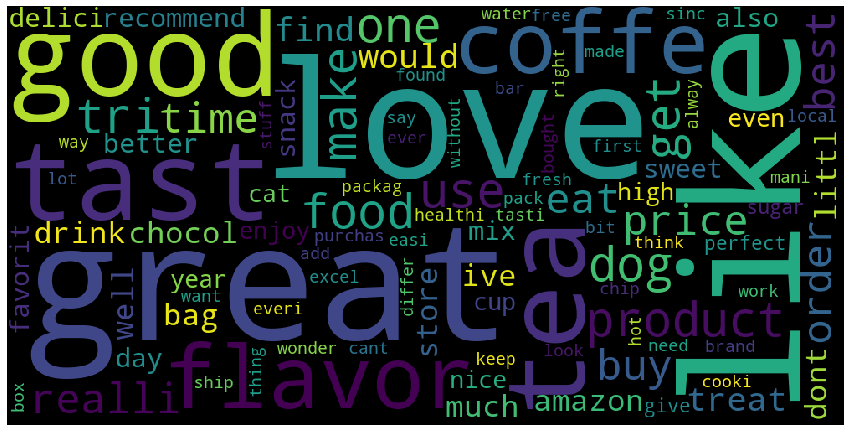

In [83]:
# WordCloud for class 1
word_could_dict = Counter(positive_100_features)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off") 
plt.show()

In [89]:
from prettytable import PrettyTable
    
x = PrettyTable()

In [90]:
x.field_names = ["Vectorization_Technique", "Best alpha", "Precision(%)", "Recall(%)", "F1 Score"]
x.add_row(["BOW", 0.10 ,92.5, 92.20, 0.875 ])
x.add_row(["tf-idf", 0.01, 86.4, 99.1, 0.838])

In [91]:
print(x)

+-------------------------+------------+--------------+-----------+----------+
| Vectorization_Technique | Best alpha | Precision(%) | Recall(%) | F1 Score |
+-------------------------+------------+--------------+-----------+----------+
|           BOW           |    0.1     |     92.5     |    92.2   |  0.875   |
|          tf-idf         |    0.01    |     86.4     |    99.1   |  0.838   |
+-------------------------+------------+--------------+-----------+----------+
